<h2>Step 0: Imports and Dataset </h2>

In [72]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-perf/Student_Performance.csv


In [73]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [74]:
df = pd.read_csv('/kaggle/input/student-perf/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0


<h2>Step 1: Data Understanding</h2>

In [75]:
df.shape

(10000, 6)

In [76]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,9985.000000,9978.000000,9993.000000,9995.000000
mean,4.992900,69.442163,6.531269,4.583709,55.223612
std,2.589309,17.342610,1.695667,2.867752,19.213183
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [77]:
df.isna().sum().sort_values()

Hours Studied                        0
Extracurricular Activities           2
Performance Index                    5
Sample Question Papers Practiced     7
Previous Scores                     15
Sleep Hours                         22
dtype: int64

In [78]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0])
df['Performance Index'] = df['Performance Index'].fillna(df['Performance Index'].mean())
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].fillna(df['Sample Question Papers Practiced'].mean())
df['Previous Scores'] = df['Previous Scores'].fillna(df['Previous Scores'].mean())
df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].mean())

df.isna().sum().sort_values()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [79]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


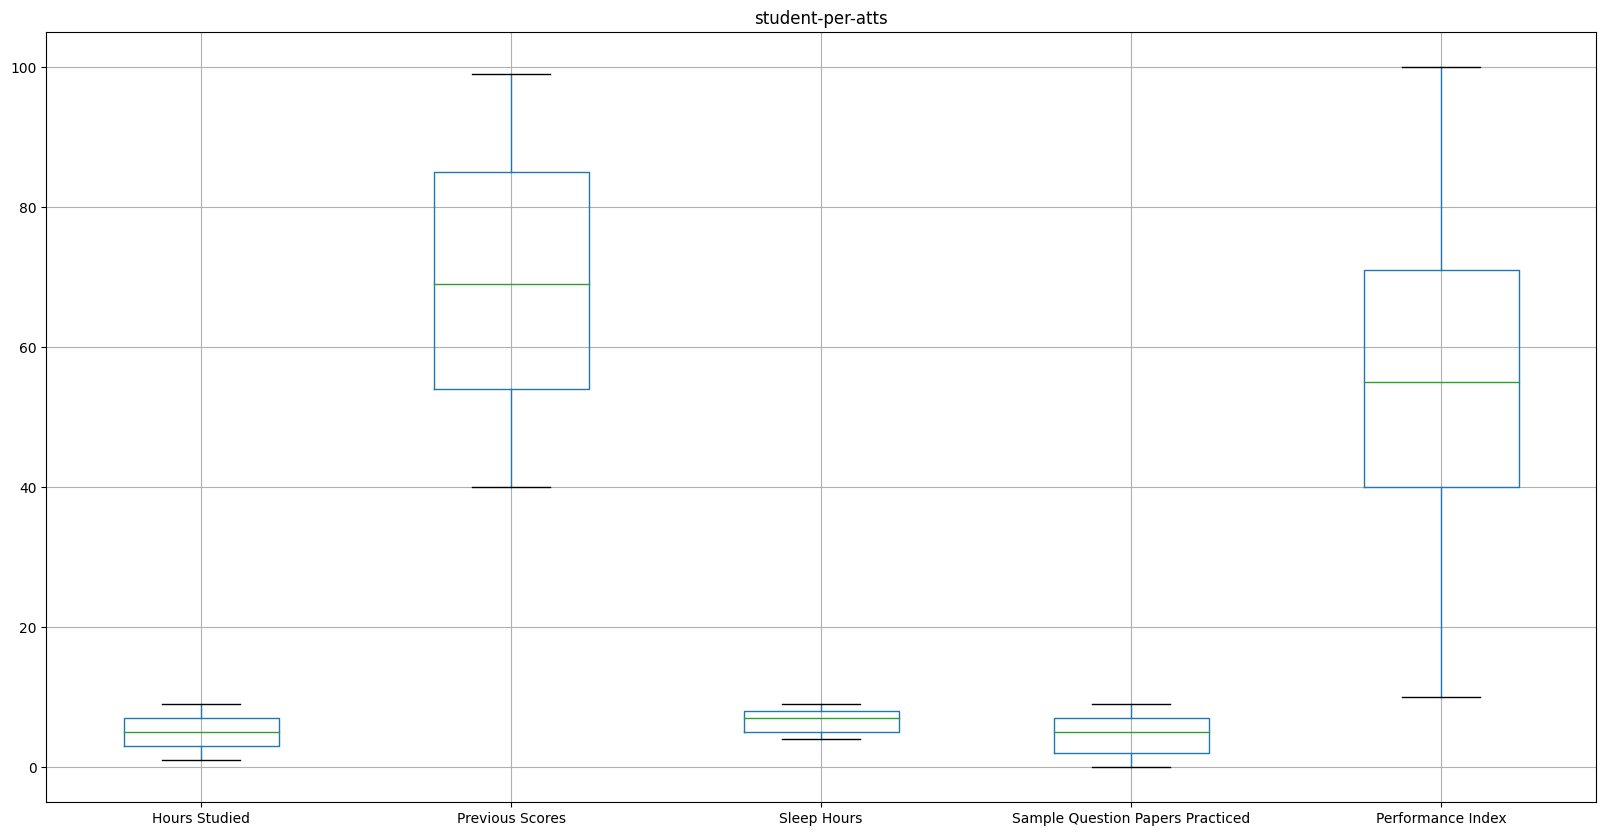

In [80]:
atts = list =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
plt.figure(figsize=(20,10))
df[atts].boxplot()
plt.title('student-per-atts')
plt.show()

In [81]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

scaler = MinMaxScaler()

# Apply scaling only to numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

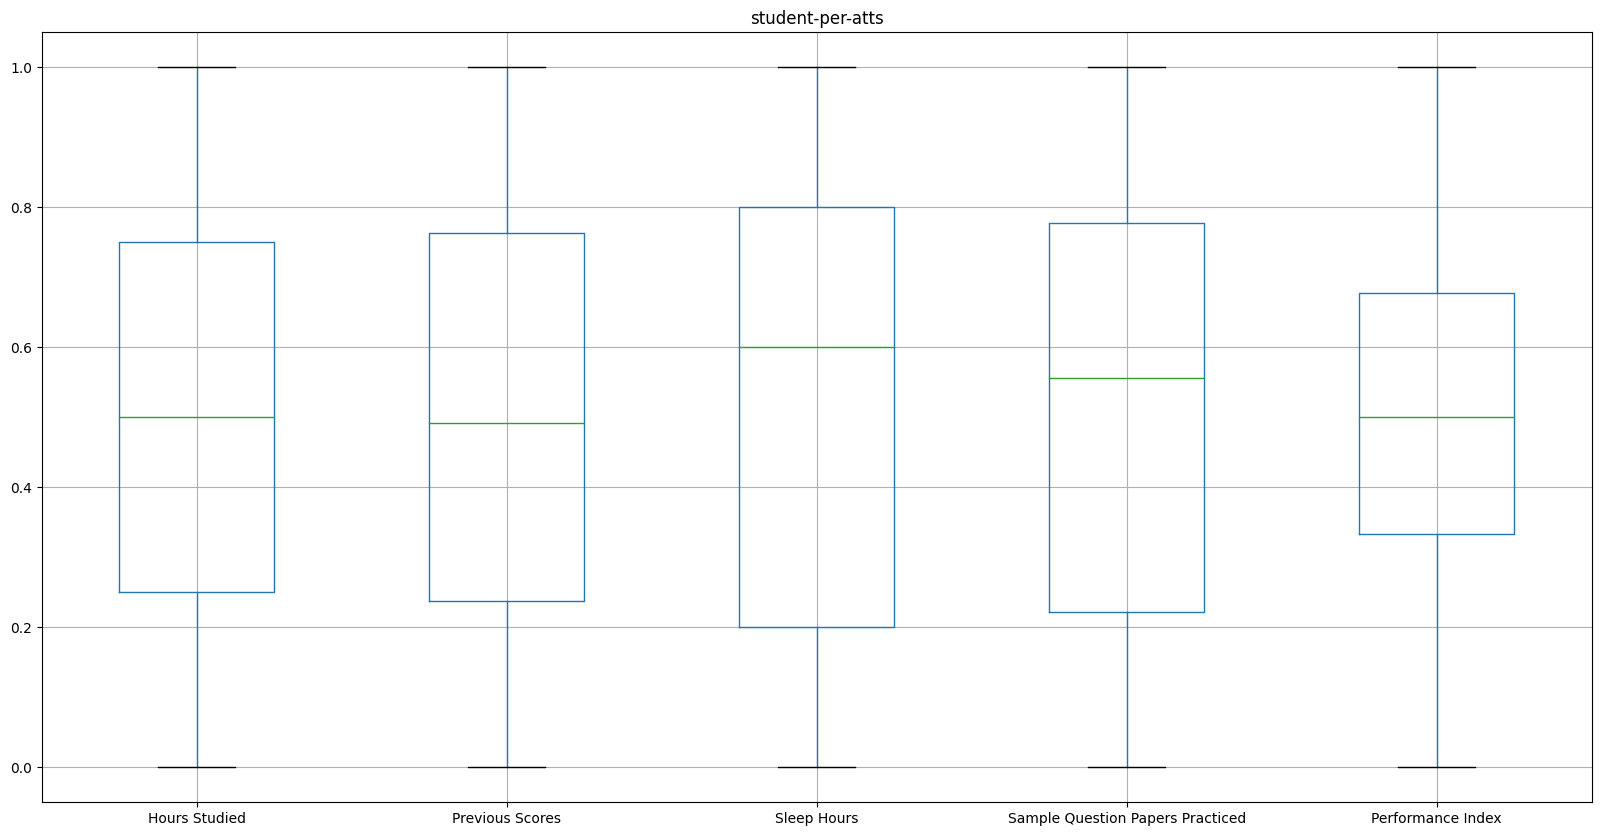

In [82]:
atts = list =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
plt.figure(figsize=(20,10))
df[atts].boxplot()
plt.title('student-per-atts')
plt.show()

In [83]:
df["Binary_Extracurricular_Active"]=df["Extracurricular Activities"].apply(lambda val: 1 if val == "Yes" else 0) 
df[["Binary_Extracurricular_Active","Extracurricular Activities"]]
x = df.drop(["Extracurricular Activities","Performance Index"], axis=1).values

In [84]:
x= df.drop("Performance Index", axis=1).values 
y = df["Performance Index"].values

In [85]:
x = df.drop(["Extracurricular Activities","Performance Index"], axis=1).values

In [86]:
#split dataset into training and test set
X_train, X_test, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [87]:
lr_mdl=LinearRegression()
lr_mdl.fit(X_train, ytrain)
lr_mdl

LinearRegression()

In [88]:
y_pred=lr_mdl.predict(X_test)

In [89]:
y_pred[:10]

array([0.62259494, 0.5598674 , 0.50170972, 0.42354204, 0.57915648,
       0.31926279, 0.83884862, 0.70373781, 0.6400577 , 0.56988723])

In [90]:
ytest[:10]

array([0.62222222, 0.56666667, 0.51111111, 0.41111111, 0.57777778,
       0.35555556, 0.86666667, 0.7       , 0.6       , 0.6       ])

In [91]:
mse = mean_squared_error(ytest, y_pred)
mse

0.0006626405806275847

In [92]:
comparison_df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
display(comparison_df)

,Actual,Predicted
0,0.622222,0.622595
1,0.566667,0.559867
2,0.511111,0.501710
3,0.411111,0.423542
4,0.577778,0.579156
...,...,...
2995,0.211111,0.240125
2996,0.566667,0.600888
2997,0.200000,0.201548
2998,0.744444,0.752577


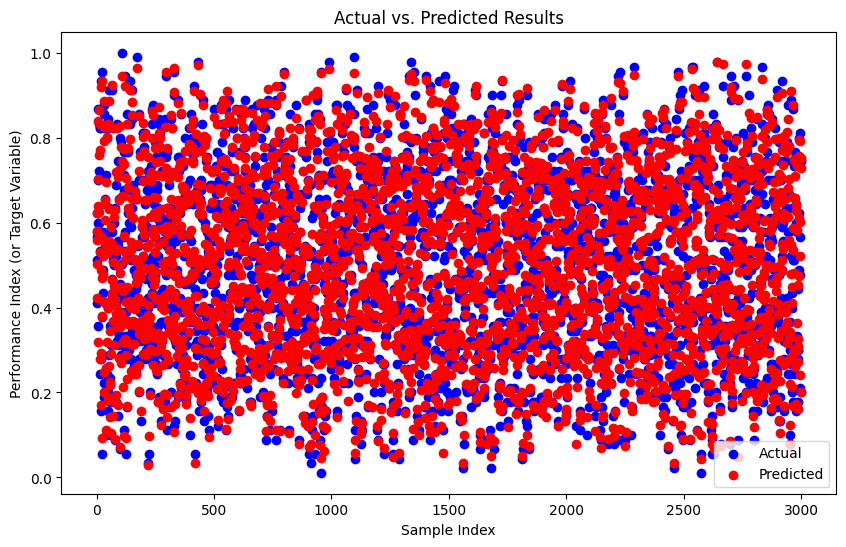

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(ytest)), ytest, color='blue', label='Actual')
plt.scatter(range(len(ytest)), y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Results')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index (or Target Variable)')
plt.legend()
plt.show()

In [94]:
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R² Score: 0.9854
Mean Absolute Error (MAE): 0.0186
Root Mean Squared Error (RMSE): 0.0257


In [95]:
import numpy as np

def predict_unseen_sample(lr_mdl, scaler, feature_columns):
    try:
        print("\n\nPredict unseen sample using trained model")
        
        # Remove the target column from the input prompts
        input_columns = [col for col in feature_columns if col != "Performance Index"]
        
        # Ask for input feature values
        unseen_data = []
        for col in input_columns:
            value = float(input(f"Enter {col}: "))
            unseen_data.append(value)
        
        # Reshape and scale the unseen data
        X_unseen = np.array(unseen_data).reshape(1, -1)
        X_unseen_scaled = scaler.transform(X_unseen)
        
        # Make predictions using the trained model
        prediction = lr_mdl.predict(X_unseen_scaled)
        
        # Display the prediction result
        print(f"\nPredicted Performance Index for sample 1: {prediction[0]:.2f}")
    
    except Exception as e:
        # Handle any errors gracefully
        print(f"An error occurred: {e}")

# Example feature columns used during training
feature_columns = [
    "Previous Scores",
    "Sample Question Papers Practiced",
    "Sleep Hours",
    "Hours Studied",
    "Binary_Extracurricular_Active",  # Input feature
    "Performance Index"  # Target variable (excluded during prediction)
]

# Uncomment below to test the function interactively
predict_unseen_sample(lr_mdl, scaler, feature_columns)



Predict unseen sample using trained model


Enter Previous Scores:  90
Enter Sample Question Papers Practiced:  5
Enter Sleep Hours:  6
Enter Hours Studied:  2
Enter Binary_Extracurricular_Active:  0



Predicted Performance Index for sample 1: 2.46


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
